In [353]:
import tensorflow.keras 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout, Activation
from keras.preprocessing.text import Tokenizer
import tensorflow as tf
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.probability import FreqDist
import pandas as pd
import time

In [354]:
motivational='''
The first and greatest victory is to conquer self Don’t stop until you’re proud.

Life shrinks or expands in proportion to one’s courage. Upgrade your conviction to match your destiny.

Tough times don’t last. Tough people do. It is during the hard times when the ‘hero’ within us is revealed.

Our greatest glory is not in never falling, but in rising every time we fall. As long as the mind can envision the fact that you can do something, you can do it, as long as you really believe 100 percent.

Don’t try to be perfect. Quitting lasts forever.

Set a goal so large that you can’t achieve it until you grow into the person who can. Think about what might go right.

The universe is a process. Try to be better than you were yesterday.

Remember it’s just a bad day, not a bad life. Take a deep breath, stay positive and know that things will get better.

The only person you are destined to become is the person you decide to be. Work hard, stay consistent, and be patient.

Courage is one step ahead of fear. Upgrade your conviction to match your destiny. 

The path to success is to take massive, determined actions. When you face your struggles, you overcome them.

Don’t think about what might go wrong. Be so good they can’t ignore you.

The mind is the limit. Work hard, stay consistent, and be patient.

Goals may give focus, but dreams give power. You can be anything you want to be, do anything you set out to accomplish if you hold to that desire with singleness of purpose.

Use what you have. Never give up

Make the most of yourself….for that is all there is of you. You have to memorize to be disciplined.

The pain you feel today will be the strength you feel tomorrow. Willing is not enough; we must do.

Keep going Try to be better than you were yesterday.

Don’t downgrade your dream just to fit your reality. Work hard, stay consistent, and be patient.

The future belongs to those who believe in the beauty of their dreams. Nothing can be done without hope and confidence. 
'''
motivational=motivational.lower()
motivational=motivational.split('\n')
motivational=list(set(motivational))
motivational.remove('')

In [355]:
demotivational='''Sex is mathematics. Individuality no longer an issue. What does intelligence signify? Define reason. Desire - meaningless. Intellect is not a cure. Justice is dead.
Just imagine how terrible it might have been if we’d been at all competent.
When you wish upon a falling star, your dreams can come true. Unless it's really a meteor hurtling to the Earth which will destroy all life. Then you're pretty much hosed no matter what you wish for. Unless it's death by meteorite.
There are no stupid questions, but there are a LOT of inquisitive idiots.
Nothing says "you're a loser" more than owning a motivational poster about being a winner.
Accept that you're just a product, not a gift.
Teach every child you meet the importance of forgiveness. It's our only hope of surviving their wrath once they realize just how badly we've screwed things up for them.
The United States was a big country where everybody wore funny t-shirts and ate too much.
You have to make the good out of the bad because that is all you have got to make it out of.
You can do anything you set your mind to when you have vision, determination, and an endless supply of expendable labor.
Happy people do not wake up for breakfast.
Life is only logical, and to think it's a gift is depressing.
Try & try until you cannot succeed.
Every dead body on Mount Everest was once a highly motivated person. Stay lazy my friends. It may save your life one day.
Furthermore, having lost faith in himself, he thought it his duty to undermine the nation's faith in itself.
If you're not a part of the solution, there's good money to be made in prolonging the problem.
The first step towards failure is trying.
Those who doubt your ability probably have a valid reason.
The best things in life are actually really expensive.
Dream is the only way for you to escape the miserable reality of your life.'''
demotivational=demotivational.lower()
demotivational=demotivational.split('\n')

In [356]:
tokenizer = RegexpTokenizer(r'\w+')
stopWords = set(stopwords.words('english'))

In [357]:
for i in range(len(motivational)):
    motivational[i]=tokenizer.tokenize(motivational[i])
    demotivational[i]=tokenizer.tokenize(demotivational[i])

In [358]:
demot=[]
mot=[]
for i in motivational:
    tempmot=[]
    for j in i:
        if j not in stopWords:
            tempmot.append(j)
    mot.append(tempmot)
for i in demotivational:
    tempdemot=[]
    for j in i:
        if j not in stopWords:
            tempdemot.append(j)
    demot.append(tempdemot)

In [359]:
for i in range(len(mot)):
    mot[i] = nltk.FreqDist(mot[i])
for i in range(len(demot)):
    demot[i] = nltk.FreqDist(demot[i])

In [360]:
df1=pd.DataFrame.from_dict(mot)
df1['class']=0
df2=pd.DataFrame.from_dict(demot)
df2['class']=1

In [361]:
final=pd.concat([df1,df2])


In [362]:
final=final.fillna(0.0)

In [363]:
final.tail()

,greatest,glory,never,falling,rising,every,time,fall,long,mind,...,doubt,ability,probably,valid,best,actually,expensive,way,escape,miserable
15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0


In [364]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final.drop('class',axis=1)
                                                    , final['class'], test_size=0.25, random_state=42)

In [365]:
X_train=X_train.values
X_test=X_test.values
y_train=y_train.values
y_test=y_test.values

In [366]:
nodes=[8, 16, 32, 64,  128,  256,  512,1024]
timesnodes=[]
trainaccnodes=[]
testaccnodes=[]
layers=[2,3,4,5]
timeslayers=[]
trainacclayers=[]
testacclayers=[]

# 8 nodes

In [367]:
model=Sequential()
model.add(Dense(8,input_dim=X_train.shape[1],activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

In [368]:
model.summary()

Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_104 (Dense)            (None, 8)                 1976      
_________________________________________________________________
dense_105 (Dense)            (None, 1)                 9         
Total params: 1,985
Trainable params: 1,985
Non-trainable params: 0
_________________________________________________________________


In [369]:
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])
t=time.time()
model.fit(X_train,y_train,epochs=100)
timesnodes.append(time.time()-t)

Epoch 1/100
1/1 [==============================] - 0s 2ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 6/100
1/1 [==============================] - 0s 2ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 8/100
1/1 [==============================] - 0s 3ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 9/100
1/1 [==============================] - 0s 2ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 6.3578e-08 - accura

1/1 [==============================] - 0s 997us/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 81/100
1/1 [==============================] - 0s 5ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 82/100
1/1 [==============================] - 0s 2ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 83/100
1/1 [==============================] - 0s 3ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 84/100
1/1 [==============================] - 0s 2ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 85/100
1/1 [==============================] - 0s 4ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 86/100
1/1 [==============================] - 0s 998us/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 87/100
1/1 [==============================] - 0s 3ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 88/100
1/1 [==============================] - 0s 2ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 89/100
1/1 [==============================] - 0s 2ms/step - loss: 6.3578e-08 - accura

In [370]:
trainaccnodes.append(model.evaluate(X_train,y_train)[1])
testaccnodes.append(model.evaluate(X_test,y_test)[1])

1/1 [==============================] - 0s 3ms/step - loss: 4.7684e-08 - accuracy: 0.4000


# 16 nodes

In [371]:
model=Sequential()
model.add(Dense(16,input_dim=X_train.shape[1],activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

In [372]:
model.summary()

Model: "sequential_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_106 (Dense)            (None, 16)                3952      
_________________________________________________________________
dense_107 (Dense)            (None, 1)                 17        
Total params: 3,969
Trainable params: 3,969
Non-trainable params: 0
_________________________________________________________________


In [373]:
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])
t=time.time()
model.fit(X_train,y_train,epochs=100)
timesnodes.append(time.time()-t)

Epoch 1/100
1/1 [==============================] - 0s 2ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 5/100
1/1 [==============================] - 0s 2ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 6/100
1/1 [==============================] - 0s 2ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 7/100
1/1 [==============================] - 0s 998us/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 10/100
1/1 [==============================] - 0s 2ms/step - loss: 6.3578e-08 - accu

1/1 [==============================] - 0s 3ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 82/100
1/1 [==============================] - 0s 9ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 83/100
1/1 [==============================] - 0s 6ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 84/100
1/1 [==============================] - 0s 2ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 85/100
1/1 [==============================] - 0s 2ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 86/100
1/1 [==============================] - 0s 3ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 87/100
1/1 [==============================] - 0s 2ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 88/100
1/1 [==============================] - 0s 5ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 89/100
1/1 [==============================] - 0s 5ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 90/100
1/1 [==============================] - 0s 998us/step - loss: 6.3578e-08 - accuracy

In [374]:
trainaccnodes.append(model.evaluate(X_train,y_train)[1])
testaccnodes.append(model.evaluate(X_test,y_test)[1])

1/1 [==============================] - 0s 2ms/step - loss: 4.7684e-08 - accuracy: 0.4000


# 32 nodes

In [375]:
model=Sequential()
model.add(Dense(32,input_dim=X_train.shape[1],activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

In [376]:
model.summary()

Model: "sequential_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_108 (Dense)            (None, 32)                7904      
_________________________________________________________________
dense_109 (Dense)            (None, 1)                 33        
Total params: 7,937
Trainable params: 7,937
Non-trainable params: 0
_________________________________________________________________


In [377]:
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])
t=time.time()
model.fit(X_train,y_train,epochs=100)
timesnodes.append(time.time()-t)

Epoch 1/100
1/1 [==============================] - 0s 11ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 5/100
1/1 [==============================] - 0s 2ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 6/100
1/1 [==============================] - 0s 2ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 7/100
1/1 [==============================] - 0s 999us/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 8/100
1/1 [==============================] - 0s 992us/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 6.3578e-08 - a

1/1 [==============================] - 0s 2ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 82/100
1/1 [==============================] - 0s 5ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 83/100
1/1 [==============================] - 0s 2ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 84/100
1/1 [==============================] - 0s 5ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 85/100
1/1 [==============================] - 0s 2ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 86/100
1/1 [==============================] - 0s 2ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 87/100
1/1 [==============================] - 0s 996us/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 88/100
1/1 [==============================] - 0s 998us/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 89/100
1/1 [==============================] - 0s 2ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 90/100
1/1 [==============================] - 0s 2ms/step - loss: 6.3578e-08 - accura

In [378]:
trainaccnodes.append(model.evaluate(X_train,y_train)[1])
testaccnodes.append(model.evaluate(X_test,y_test)[1])

1/1 [==============================] - 0s 5ms/step - loss: 4.7684e-08 - accuracy: 0.4000


# 64 nodes

In [379]:
model=Sequential()
model.add(Dense(64,input_dim=X_train.shape[1],activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

In [380]:
model.summary()

Model: "sequential_42"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_110 (Dense)            (None, 64)                15808     
_________________________________________________________________
dense_111 (Dense)            (None, 1)                 65        
Total params: 15,873
Trainable params: 15,873
Non-trainable params: 0
_________________________________________________________________


In [381]:
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])
t=time.time()
model.fit(X_train,y_train,epochs=100)
timesnodes.append(time.time()-t)

Epoch 1/100
1/1 [==============================] - 0s 6ms/step - loss: 6.3578e-08 - accuracy: 0.4667
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 6.3578e-08 - accuracy: 0.4667
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 6.3578e-08 - accuracy: 0.4667
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 6.3578e-08 - accuracy: 0.4667
Epoch 5/100
1/1 [==============================] - 0s 3ms/step - loss: 6.3578e-08 - accuracy: 0.4667
Epoch 6/100
1/1 [==============================] - 0s 2ms/step - loss: 6.3578e-08 - accuracy: 0.4667
Epoch 7/100
1/1 [==============================] - 0s 3ms/step - loss: 6.3578e-08 - accuracy: 0.4667
Epoch 8/100
1/1 [==============================] - 0s 2ms/step - loss: 6.3578e-08 - accuracy: 0.4667
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 6.3578e-08 - accuracy: 0.4667
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 6.3578e-08 - accura

1/1 [==============================] - 0s 6ms/step - loss: 6.3578e-08 - accuracy: 0.4667
Epoch 81/100
1/1 [==============================] - 0s 2ms/step - loss: 6.3578e-08 - accuracy: 0.4667
Epoch 82/100
1/1 [==============================] - 0s 997us/step - loss: 6.3578e-08 - accuracy: 0.4667
Epoch 83/100
1/1 [==============================] - 0s 3ms/step - loss: 6.3578e-08 - accuracy: 0.4667
Epoch 84/100
1/1 [==============================] - 0s 2ms/step - loss: 6.3578e-08 - accuracy: 0.4667
Epoch 85/100
1/1 [==============================] - 0s 7ms/step - loss: 6.3578e-08 - accuracy: 0.4667
Epoch 86/100
1/1 [==============================] - 0s 997us/step - loss: 6.3578e-08 - accuracy: 0.4667
Epoch 87/100
1/1 [==============================] - 0s 4ms/step - loss: 6.3578e-08 - accuracy: 0.4667
Epoch 88/100
1/1 [==============================] - 0s 2ms/step - loss: 6.3578e-08 - accuracy: 0.4667
Epoch 89/100
1/1 [==============================] - 0s 2ms/step - loss: 6.3578e-08 - accura

In [382]:
trainaccnodes.append(model.evaluate(X_train,y_train)[1])
testaccnodes.append(model.evaluate(X_test,y_test)[1])

1/1 [==============================] - 0s 2ms/step - loss: 4.7684e-08 - accuracy: 0.6000


# 128 nodes

In [383]:
model=Sequential()
model.add(Dense(128,input_dim=X_train.shape[1],activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

In [384]:
model.summary()

Model: "sequential_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_112 (Dense)            (None, 128)               31616     
_________________________________________________________________
dense_113 (Dense)            (None, 1)                 129       
Total params: 31,745
Trainable params: 31,745
Non-trainable params: 0
_________________________________________________________________


In [385]:
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])
t=time.time()
model.fit(X_train,y_train,epochs=100)
timesnodes.append(time.time()-t)

Epoch 1/100
1/1 [==============================] - 0s 4ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 2/100
1/1 [==============================] - 0s 3ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 4/100
1/1 [==============================] - 0s 3ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 5/100
1/1 [==============================] - 0s 2ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 8/100
1/1 [==============================] - 0s 3ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 9/100
1/1 [==============================] - 0s 997us/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 6.3578e-08 - accu

1/1 [==============================] - 0s 3ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 81/100
1/1 [==============================] - 0s 2ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 82/100
1/1 [==============================] - 0s 2ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 83/100
1/1 [==============================] - 0s 2ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 84/100
1/1 [==============================] - 0s 998us/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 85/100
1/1 [==============================] - 0s 4ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 86/100
1/1 [==============================] - 0s 2ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 87/100
1/1 [==============================] - 0s 2ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 88/100
1/1 [==============================] - 0s 2ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 89/100
1/1 [==============================] - 0s 998us/step - loss: 6.3578e-08 - accura

In [386]:
trainaccnodes.append(model.evaluate(X_train,y_train)[1])
testaccnodes.append(model.evaluate(X_test,y_test)[1])

1/1 [==============================] - 0s 8ms/step - loss: 4.7684e-08 - accuracy: 0.4000


# 256 nodes

In [387]:
model=Sequential()
model.add(Dense(256,input_dim=X_train.shape[1],activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

In [388]:
model.summary()

Model: "sequential_44"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_114 (Dense)            (None, 256)               63232     
_________________________________________________________________
dense_115 (Dense)            (None, 1)                 257       
Total params: 63,489
Trainable params: 63,489
Non-trainable params: 0
_________________________________________________________________


In [389]:
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])
t=time.time()
model.fit(X_train,y_train,epochs=100)
timesnodes.append(time.time()-t)

Epoch 1/100
1/1 [==============================] - 0s 2ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 6/100
1/1 [==============================] - 0s 2ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 8/100
1/1 [==============================] - 0s 2ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 9/100
1/1 [==============================] - 0s 2ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 6.3578e-08 - accura

1/1 [==============================] - 0s 2ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 82/100
1/1 [==============================] - 0s 2ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 83/100
1/1 [==============================] - 0s 997us/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 84/100
1/1 [==============================] - 0s 2ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 85/100
1/1 [==============================] - 0s 4ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 86/100
1/1 [==============================] - 0s 2ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 87/100
1/1 [==============================] - 0s 2ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 88/100
1/1 [==============================] - 0s 2ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 89/100
1/1 [==============================] - 0s 998us/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 90/100
1/1 [==============================] - 0s 3ms/step - loss: 6.3578e-08 - accura

In [390]:
trainaccnodes.append(model.evaluate(X_train,y_train)[1])
testaccnodes.append(model.evaluate(X_test,y_test)[1])

1/1 [==============================] - 0s 995us/step - loss: 4.7684e-08 - accuracy: 0.4000


# 512 nodes

In [391]:
model=Sequential()
model.add(Dense(512,input_dim=X_train.shape[1],activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

In [392]:
model.summary()

Model: "sequential_45"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_116 (Dense)            (None, 512)               126464    
_________________________________________________________________
dense_117 (Dense)            (None, 1)                 513       
Total params: 126,977
Trainable params: 126,977
Non-trainable params: 0
_________________________________________________________________


In [393]:
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])
t=time.time()
model.fit(X_train,y_train,epochs=100)
timesnodes.append(time.time()-t)

Epoch 1/100
1/1 [==============================] - 0s 2ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 5/100
1/1 [==============================] - 0s 2ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 8/100
1/1 [==============================] - 0s 3ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 10/100
1/1 [==============================] - 0s 3ms/step - loss: 6.3578e-08 - accura

1/1 [==============================] - 0s 4ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 82/100
1/1 [==============================] - 0s 2ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 83/100
1/1 [==============================] - 0s 5ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 84/100
1/1 [==============================] - 0s 2ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 85/100
1/1 [==============================] - 0s 2ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 86/100
1/1 [==============================] - 0s 4ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 87/100
1/1 [==============================] - 0s 2ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 88/100
1/1 [==============================] - 0s 5ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 89/100
1/1 [==============================] - 0s 8ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 90/100
1/1 [==============================] - 0s 2ms/step - loss: 6.3578e-08 - accuracy: 

In [394]:
trainaccnodes.append(model.evaluate(X_train,y_train)[1])
testaccnodes.append(model.evaluate(X_test,y_test)[1])

1/1 [==============================] - 0s 2ms/step - loss: 4.7684e-08 - accuracy: 0.4000


# 1024 nodes

In [395]:
model=Sequential()
model.add(Dense(1024,input_dim=X_train.shape[1],activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

In [396]:
model.summary()

Model: "sequential_46"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_118 (Dense)            (None, 1024)              252928    
_________________________________________________________________
dense_119 (Dense)            (None, 1)                 1025      
Total params: 253,953
Trainable params: 253,953
Non-trainable params: 0
_________________________________________________________________


In [397]:
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])
t=time.time()
model.fit(X_train,y_train,epochs=100)
timesnodes.append(time.time()-t)

Epoch 1/100
1/1 [==============================] - 0s 2ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 5/100
1/1 [==============================] - 0s 2ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 10/100
1/1 [==============================] - 0s 3ms/step - loss: 6.3578e-08 - accura

1/1 [==============================] - 0s 2ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 82/100
1/1 [==============================] - 0s 2ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 83/100
1/1 [==============================] - 0s 3ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 84/100
1/1 [==============================] - 0s 3ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 85/100
1/1 [==============================] - 0s 2ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 86/100
1/1 [==============================] - 0s 3ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 87/100
1/1 [==============================] - 0s 4ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 88/100
1/1 [==============================] - 0s 6ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 89/100
1/1 [==============================] - 0s 1ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 90/100
1/1 [==============================] - 0s 997us/step - loss: 6.3578e-08 - accuracy

In [398]:
trainaccnodes.append(model.evaluate(X_train,y_train)[1])
testaccnodes.append(model.evaluate(X_test,y_test)[1])

1/1 [==============================] - 0s 3ms/step - loss: 4.7684e-08 - accuracy: 0.7000


# 2 layers

In [399]:
model=Sequential()
model.add(Dense(32,input_dim=X_train.shape[1],activation='sigmoid'))
model.add(Dense(32,activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

In [400]:
model.summary()

Model: "sequential_47"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_120 (Dense)            (None, 32)                7904      
_________________________________________________________________
dense_121 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_122 (Dense)            (None, 1)                 33        
Total params: 8,993
Trainable params: 8,993
Non-trainable params: 0
_________________________________________________________________


In [401]:
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])
t=time.time()
model.fit(X_train,y_train,epochs=100)
timeslayers.append(time.time()-t)

Epoch 1/100
1/1 [==============================] - 0s 3ms/step - loss: 6.3578e-08 - accuracy: 0.4667
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 6.3578e-08 - accuracy: 0.4667
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 6.3578e-08 - accuracy: 0.4667
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 6.3578e-08 - accuracy: 0.4667
Epoch 5/100
1/1 [==============================] - 0s 3ms/step - loss: 6.3578e-08 - accuracy: 0.4667
Epoch 6/100
1/1 [==============================] - 0s 2ms/step - loss: 6.3578e-08 - accuracy: 0.4667
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 6.3578e-08 - accuracy: 0.4667
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 6.3578e-08 - accuracy: 0.4667
Epoch 9/100
1/1 [==============================] - 0s 3ms/step - loss: 6.3578e-08 - accuracy: 0.4667
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 6.3578e-08 - accura

1/1 [==============================] - 0s 2ms/step - loss: 6.3578e-08 - accuracy: 0.4667
Epoch 81/100
1/1 [==============================] - 0s 2ms/step - loss: 6.3578e-08 - accuracy: 0.4667
Epoch 82/100
1/1 [==============================] - 0s 2ms/step - loss: 6.3578e-08 - accuracy: 0.4667
Epoch 83/100
1/1 [==============================] - 0s 2ms/step - loss: 6.3578e-08 - accuracy: 0.4667
Epoch 84/100
1/1 [==============================] - 0s 2ms/step - loss: 6.3578e-08 - accuracy: 0.4667
Epoch 85/100
1/1 [==============================] - ETA: 0s - loss: 6.3578e-08 - accuracy: 0.46 - 0s 3ms/step - loss: 6.3578e-08 - accuracy: 0.4667
Epoch 86/100
1/1 [==============================] - 0s 3ms/step - loss: 6.3578e-08 - accuracy: 0.4667
Epoch 87/100
1/1 [==============================] - 0s 2ms/step - loss: 6.3578e-08 - accuracy: 0.4667
Epoch 88/100
1/1 [==============================] - 0s 2ms/step - loss: 6.3578e-08 - accuracy: 0.4667
Epoch 89/100
1/1 [==============================]

In [402]:
trainacclayers.append(model.evaluate(X_train,y_train)[1])
testacclayers.append(model.evaluate(X_test,y_test)[1])

1/1 [==============================] - 0s 3ms/step - loss: 4.7684e-08 - accuracy: 0.6000


# 3 layers

In [403]:
model=Sequential()
model.add(Dense(32,input_dim=X_train.shape[1],activation='sigmoid'))
model.add(Dense(32,activation='sigmoid'))
model.add(Dense(32,activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

In [404]:
model.summary()

Model: "sequential_48"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_123 (Dense)            (None, 32)                7904      
_________________________________________________________________
dense_124 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_125 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_126 (Dense)            (None, 1)                 33        
Total params: 10,049
Trainable params: 10,049
Non-trainable params: 0
_________________________________________________________________


In [405]:
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])
t=time.time()
model.fit(X_train,y_train,epochs=100)
timeslayers.append(time.time()-t)

Epoch 1/100
1/1 [==============================] - 0s 3ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 3/100
1/1 [==============================] - 0s 3ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 4/100
1/1 [==============================] - 0s 997us/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 5/100
1/1 [==============================] - 0s 2ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 6/100
1/1 [==============================] - 0s 998us/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 8/100
1/1 [==============================] - 0s 2ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 9/100
1/1 [==============================] - 0s 3ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 10/100
1/1 [==============================] - 0s 3ms/step - loss: 6.3578e-08 - ac

1/1 [==============================] - 0s 5ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 81/100
1/1 [==============================] - 0s 2ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 82/100
1/1 [==============================] - 0s 2ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 83/100
1/1 [==============================] - 0s 2ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 84/100
1/1 [==============================] - 0s 2ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 85/100
1/1 [==============================] - 0s 2ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 86/100
1/1 [==============================] - 0s 3ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 87/100
1/1 [==============================] - 0s 3ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 88/100
1/1 [==============================] - 0s 2ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 89/100
1/1 [==============================] - 0s 3ms/step - loss: 6.3578e-08 - accuracy: 

In [406]:
trainacclayers.append(model.evaluate(X_train,y_train)[1])
testacclayers.append(model.evaluate(X_test,y_test)[1])

1/1 [==============================] - 0s 983us/step - loss: 4.7684e-08 - accuracy: 0.4000


# 4 layers

In [407]:
model=Sequential()
model.add(Dense(32,input_dim=X_train.shape[1],activation='sigmoid'))
model.add(Dense(32,activation='sigmoid'))
model.add(Dense(32,activation='sigmoid'))
model.add(Dense(32,activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

In [408]:
model.summary()

Model: "sequential_49"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_127 (Dense)            (None, 32)                7904      
_________________________________________________________________
dense_128 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_129 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_130 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_131 (Dense)            (None, 1)                 33        
Total params: 11,105
Trainable params: 11,105
Non-trainable params: 0
_________________________________________________________________


In [409]:
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])
t=time.time()
model.fit(X_train,y_train,epochs=100)
timeslayers.append(time.time()-t)

Epoch 1/100
1/1 [==============================] - 0s 2ms/step - loss: 6.3578e-08 - accuracy: 0.4667
Epoch 2/100
1/1 [==============================] - 0s 997us/step - loss: 6.3578e-08 - accuracy: 0.4667
Epoch 3/100
1/1 [==============================] - 0s 3ms/step - loss: 6.3578e-08 - accuracy: 0.4667
Epoch 4/100
1/1 [==============================] - 0s 3ms/step - loss: 6.3578e-08 - accuracy: 0.4667
Epoch 5/100
1/1 [==============================] - 0s 2ms/step - loss: 6.3578e-08 - accuracy: 0.4667
Epoch 6/100
1/1 [==============================] - 0s 2ms/step - loss: 6.3578e-08 - accuracy: 0.4667
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 6.3578e-08 - accuracy: 0.4667
Epoch 8/100
1/1 [==============================] - 0s 2ms/step - loss: 6.3578e-08 - accuracy: 0.4667
Epoch 9/100
1/1 [==============================] - 0s 3ms/step - loss: 6.3578e-08 - accuracy: 0.4667
Epoch 10/100
1/1 [==============================] - 0s 2ms/step - loss: 6.3578e-08 - accu

1/1 [==============================] - 0s 2ms/step - loss: 6.3578e-08 - accuracy: 0.4667
Epoch 81/100
1/1 [==============================] - 0s 4ms/step - loss: 6.3578e-08 - accuracy: 0.4667
Epoch 82/100
1/1 [==============================] - 0s 2ms/step - loss: 6.3578e-08 - accuracy: 0.4667
Epoch 83/100
1/1 [==============================] - 0s 2ms/step - loss: 6.3578e-08 - accuracy: 0.4667
Epoch 84/100
1/1 [==============================] - 0s 2ms/step - loss: 6.3578e-08 - accuracy: 0.4667
Epoch 85/100
1/1 [==============================] - 0s 2ms/step - loss: 6.3578e-08 - accuracy: 0.4667
Epoch 86/100
1/1 [==============================] - 0s 2ms/step - loss: 6.3578e-08 - accuracy: 0.4667
Epoch 87/100
1/1 [==============================] - 0s 2ms/step - loss: 6.3578e-08 - accuracy: 0.4667
Epoch 88/100
1/1 [==============================] - 0s 5ms/step - loss: 6.3578e-08 - accuracy: 0.4667
Epoch 89/100
1/1 [==============================] - 0s 2ms/step - loss: 6.3578e-08 - accuracy: 

In [410]:
trainacclayers.append(model.evaluate(X_train,y_train)[1])
testacclayers.append(model.evaluate(X_test,y_test)[1])

1/1 [==============================] - 0s 3ms/step - loss: 4.7684e-08 - accuracy: 0.6000


# 5 layers

In [411]:
model=Sequential()
model.add(Dense(32,input_dim=X_train.shape[1],activation='sigmoid'))
model.add(Dense(32,activation='sigmoid'))
model.add(Dense(32,activation='sigmoid'))
model.add(Dense(32,activation='sigmoid'))
model.add(Dense(32,activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

In [412]:
model.summary()

Model: "sequential_50"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_132 (Dense)            (None, 32)                7904      
_________________________________________________________________
dense_133 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_134 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_135 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_136 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_137 (Dense)            (None, 1)                 33        
Total params: 12,161
Trainable params: 12,161
Non-trainable params: 0
_________________________________________________

In [413]:
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])
t=time.time()
model.fit(X_train,y_train,epochs=100)
timeslayers.append(time.time()-t)

Epoch 1/100
1/1 [==============================] - 0s 3ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 5/100
1/1 [==============================] - 0s 2ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 8/100
1/1 [==============================] - 0s 2ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 9/100
1/1 [==============================] - 0s 1ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 10/100
1/1 [==============================] - 0s 2ms/step - loss: 6.3578e-08 - accura

1/1 [==============================] - 0s 3ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 82/100
1/1 [==============================] - 0s 2ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 83/100
1/1 [==============================] - 0s 3ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 84/100
1/1 [==============================] - 0s 997us/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 85/100
1/1 [==============================] - 0s 2ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 86/100
1/1 [==============================] - 0s 2ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 87/100
1/1 [==============================] - 0s 5ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 88/100
1/1 [==============================] - 0s 2ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 89/100
1/1 [==============================] - 0s 3ms/step - loss: 6.3578e-08 - accuracy: 0.5333
Epoch 90/100
1/1 [==============================] - 0s 4ms/step - loss: 6.3578e-08 - accuracy

In [414]:
trainacclayers.append(model.evaluate(X_train,y_train)[1])
testacclayers.append(model.evaluate(X_test,y_test)[1])

1/1 [==============================] - 0s 3ms/step - loss: 4.7684e-08 - accuracy: 0.4000


In [415]:
import matplotlib.pyplot as plt

In [416]:
layers=['2','3','4','5']

In [417]:
nodes=[str(i) for i in nodes]

In [418]:
from pylab import rcParams
import numpy as np
rcParams['figure.figsize'] = 9,5

<AxesSubplot:title={'center':'Varying Number of Nodes'}, xlabel='Nodes', ylabel='Training accuracy'>

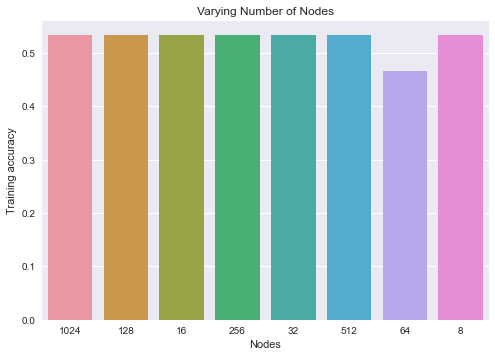

In [428]:
import seaborn as sns
plt.title("Varying Number of Nodes")
plt.xlabel('Nodes')
plt.ylabel('Training accuracy')
sns.barplot(nodes,trainaccnodes)

<AxesSubplot:title={'center':'Varying Number of Nodes'}, xlabel='Nodes', ylabel='Testing accuracy'>

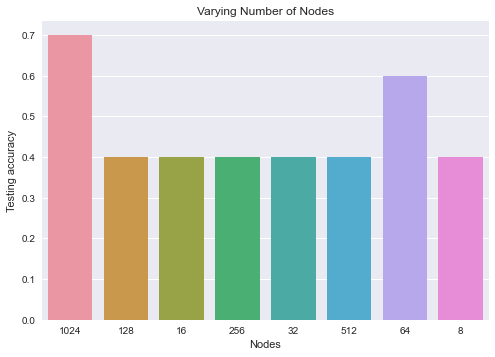

In [429]:
import seaborn as sns
plt.title("Varying Number of Nodes")
plt.xlabel('Nodes')
plt.ylabel('Testing accuracy')
sns.barplot(nodes,testaccnodes)

Text(0.5, 1.0, 'Varying Number of Nodes')

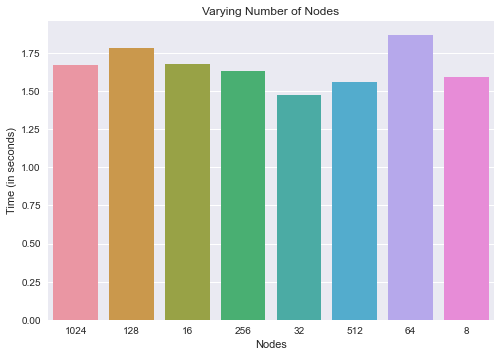

In [430]:
plt.xlabel('Nodes')
plt.ylabel('Time (in seconds)')
sns.barplot(nodes,timesnodes)
plt.title("Varying Number of Nodes")

<AxesSubplot:title={'center':'Varying Number of layers'}, xlabel='Nodes', ylabel='Training accuracy'>

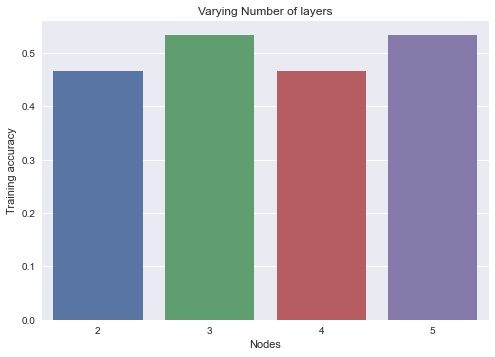

In [432]:
plt.title("Varying Number of layers")
plt.xlabel('Nodes')
plt.ylabel('Training accuracy')
sns.barplot(layers,trainacclayers)

<AxesSubplot:title={'center':'Varying Number of layers'}, xlabel='Nodes', ylabel='Testing accuracy'>

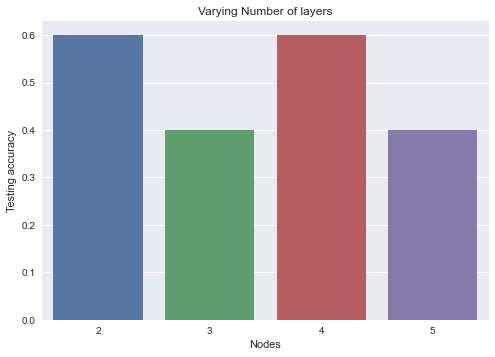

In [431]:
plt.title("Varying Number of layers")
plt.xlabel('Nodes')
plt.ylabel('Testing accuracy')
sns.barplot(layers,testacclayers)

Text(0.5, 1.0, 'Varying Number of Layers')

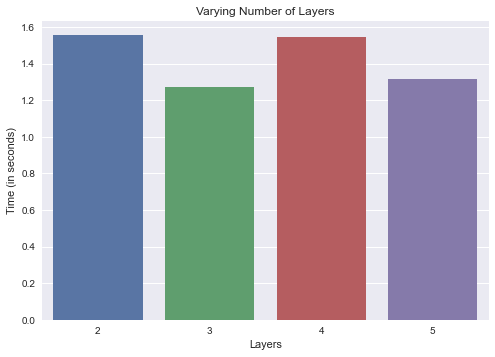

In [433]:
plt.xlabel('Layers')
plt.ylabel('Time (in seconds)')
sns.barplot(layers,timeslayers)
plt.title("Varying Number of Layers")
